In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from tensorflow.keras import Sequential

In [2]:
#loading cifar10 dataset which is prebuilt in tensorflow
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.cifar10.load_data()

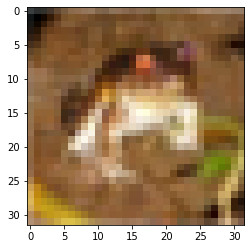

In [4]:
#checking for data if it is loaded or not
plt.imshow(xtrain[0])

In [5]:
#checking for the shape of the data
xtrain.shape,xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
#normalizing the data which converts data ranging from (0 to 255) -> (0 to 1) 
xtrain = xtrain/255.0
xtest = xtest/255.0
xtrain[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
#building the model
model = Sequential([Conv2D(filters=32,kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
                   MaxPool2D(pool_size=2,strides=2, padding='valid'),
                   Flatten(),
                   Dense(100,activation="relu"),
                   Dense(10,activation="softmax")])

In [12]:
 #model needs to be compiled before it is trained on the dataset
    model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [13]:
#training the CNN model with 10 epochs
history = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.8908 - accuracy: 0.3311 - val_loss: 1.6859 - val_accuracy: 0.4122
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5718 - accuracy: 0.4462 - val_loss: 1.4574 - val_accuracy: 0.4819
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3801 - accuracy: 0.5104 - val_loss: 1.3634 - val_accuracy: 0.5224
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2813 - accuracy: 0.5475 - val_loss: 1.2827 - val_accuracy: 0.5474
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2140 - accuracy: 0.5734 - val_loss: 1.2132 - val_accuracy: 0.5684
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1608 - accuracy: 0.5929 - val_loss: 1.2579 - val_accuracy: 0.5528
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1123 - accuracy: 0.6106 - val_loss: 1.2140 -

In [16]:
#predicting the test values
predicted = model.predict(xtest)

313/313 [==============================] - 2s 6ms/step


In [17]:
predicted[0]

array([0.00428185, 0.00359572, 0.02500639, 0.7028657 , 0.03333816,
       0.18724094, 0.0350663 , 0.00116917, 0.00328384, 0.00415196],
      dtype=float32)

In [18]:
import random
n = random.randint(0,999)

Text(0.5, 0, 'model predicted it as a :truck')

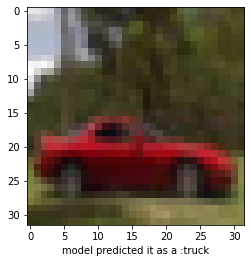

In [84]:
n = random.randint(0,999)
#creating a list of classes to give particular output
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#getting the index with max value
value=predicted[n][0]
index=0
for i in range(len(predicted[n])):
    if value<predicted[n][i]:
        index = i

        
        
#showing output by plotting the image and the corresponding output
plt.imshow(xtest[n])
plt.xlabel("model predicted it as a :"+classes[index])

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

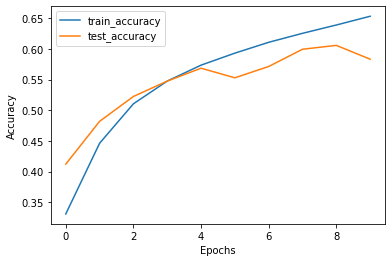

In [54]:
#plotting accuracy parameters
plt.plot(history.history['accuracy'],label="train_accuracy")
plt.plot(history.history['val_accuracy'],label="test_accuracy")
plt.legend(loc="upper left")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

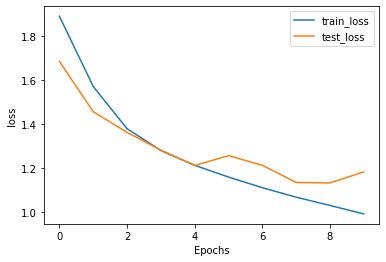

In [55]:
#plotting Loss parameters
plt.plot(history.history['loss'],label="train_loss")
plt.plot(history.history['val_loss'],label="test_loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()